In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import time
import copy


In [2]:
coordinates = np.array([[565.0, 575.0], [25.0, 185.0], [345.0, 750.0], [945.0, 685.0], [845.0, 655.0],
                        [880.0, 660.0], [25.0, 230.0], [525.0, 1000.0], [580.0, 1175.0], [650.0, 1130.0],
                        [1605.0, 620.0], [1220.0, 580.0], [1465.0, 200.0], [1530.0, 5.0], [845.0, 680.0],
                        [725.0, 370.0], [145.0, 665.0], [415.0, 635.0], [510.0, 875.0], [560.0, 365.0],
                        [300.0, 465.0], [520.0, 585.0], [480.0, 415.0], [835.0, 625.0], [975.0, 580.0],
                        [1215.0, 245.0], [1320.0, 315.0], [1250.0, 400.0], [660.0, 180.0], [410.0, 250.0],
                        [420.0, 555.0], [575.0, 665.0], [1150.0, 1160.0], [700.0, 580.0], [685.0, 595.0],
                        [685.0, 610.0], [770.0, 610.0], [795.0, 645.0], [720.0, 635.0], [760.0, 650.0],
                        [475.0, 960.0], [95.0, 260.0], [875.0, 920.0], [700.0, 500.0], [555.0, 815.0],
                        [830.0, 485.0], [1170.0, 65.0], [830.0, 610.0], [605.0, 625.0], [595.0, 360.0],
                        [1340.0, 725.0], [1740.0, 245.0]])
gl_num = coordinates.shape[0]  # number of cities
coord_x = coordinates[:, 0]  
coord_y = coordinates[:, 1]  
gl_dist = np.zeros((gl_num, gl_num))  # distance
gl_nowRoute = list(range(0, gl_num))  # current solution
gl_nowDistValue = 0.0  # distance of current solution
bestRoute = [0] * gl_num  # best solution
bestDistValue = 0.0  # distanceof best aolution
# tabu search paramentes
tabu = np.zeros((gl_num, gl_num))  # tabu table
tabulen = 8  # tabu length
spe = 5  # aspiration
Times = 100  # number of iteration


In [3]:
def initDist():
    """
    init distance matrix, dist[i][j]：euclidean distance
    :return:
    """
    global gl_dist
    for i in range(gl_num):
        xi = coord_x[i]
        yi = coord_y[i]
        for j in range(i, gl_num):
            xj = coord_x[j]
            yj = coord_y[j]
            gl_dist[i][j] = gl_dist[j][i] = math.sqrt((xi - xj) ** 2 + (yi - yj) ** 2)

def getDist(route):
    """
    calculate distance of solution
    :param route:
    :return:
    """
    distValue = 0.0
    for i in range(0, gl_num - 1):
        distValue += gl_dist[route[i]][route[i + 1]]
    distValue += gl_dist[route[gl_num - 1]][0]  # 从最后一个城市回到起点的距离
    return distValue


def cop(a, b):  # 把b数组的值赋值a数组，深拷贝
    for i in range(gl_num):
        a[i] = b[i]


def init():
    """
    init solution and distance
    :return:
    """
    global gl_nowRoute, gl_nowDistValue, bestDistValue, bestRoute
    initDist()
    temp_list = gl_nowRoute[1:]  
    np.random.shuffle(temp_list)
    gl_nowRoute = gl_nowRoute[:1] + temp_list 

    # gl_nowRoute = [0, 21, 30, 17, 2, 16, 20, 41, 6, 1, 29, 22, 19, 49, 28, 15, 45, 43, 33, 38, 39, 37, 14, 4, 5, 3, 24, 11, 27, 26, 25, 46, 12, 13, 51, 10, 50, 32, 42, 9, 8, 7, 40, 18, 44, 31, 48, 35, 47, 23, 36, 34]
    gl_nowDistValue = getDist(gl_nowRoute)
    print("init solutio：", gl_nowRoute)
    print("init distance：", gl_nowDistValue)
    cop(bestRoute, gl_nowRoute)
    bestDistValue = gl_nowDistValue 


def solve():
    global gl_nowRoute, bestRoute, bestDistValue
    tempResult = [0] * gl_num 
    index1 = 0
    index2 = 0 
    tempRoute = copy.deepcopy(gl_nowRoute)
    tempDistValue = gl_nowDistValue  
    # explore all neigborhoods
    for i in range(1, gl_num):  
        for j in range(1, gl_num):
            if (i + j) >= gl_num:
                break
            if i == j:
                continue
            cop(tempResult, gl_nowRoute)
            tempResult[i], tempResult[i + j] = tempResult[i + j], tempResult[i]  
            tempValue = getDist(tempResult)
            
            if (tempValue <= bestDistValue) & (tabu[i][i + j] < spe):
                cop(bestRoute, tempResult)
                bestDistValue = tempValue
                index1 = i
                index2 = i + j
                cop(tempRoute, tempResult)
                tempDistValue = tempValue
            elif (tabu[i][i + j] == 0) & (tempValue < tempDistValue):
                cop(tempRoute, tempResult)
                tempDistValue = tempValue
                index1 = i
                index2 = i + j

    cop(gl_nowRoute, tempRoute) 
    for i in range(gl_num): 
        for j in range(gl_num):
            if tabu[i][j] > 0:
                tabu[i][j] -= 1
    tabu[index1][index2] = tabulen 


def draw(route):
    """
    plot best solution
    :param route:
    :return:
    """
    x = [0] * (gl_num + 1)
    y = [0] * (gl_num + 1)
    for i in range(gl_num):
        index = route[i]
        x[i] = coordinates[index][0]
        y[i] = coordinates[index][1]
    x[gl_num] = coordinates[0][0]
    y[gl_num] = coordinates[0][1]
    plt.plot(x, y, c='r', marker='*')
    plt.show()

def draw_scatter():
    fig,ax=plt.subplots()
    
    for i,txt in enumerate(coordinates):
        ax.scatter(coordinates[i][0], coordinates[i][1], c='b', marker='*')
        ax.annotate(i,(coordinates[i][0],coordinates[i][1]))
    plt.show()

init solutio： [0, 7, 5, 24, 11, 29, 25, 16, 38, 14, 44, 31, 2, 15, 26, 21, 32, 47, 1, 13, 3, 50, 48, 42, 8, 46, 6, 12, 20, 23, 18, 37, 22, 9, 45, 17, 33, 43, 10, 30, 40, 27, 41, 35, 34, 19, 36, 51, 28, 4, 49, 39]
init distance： 32722.66286008506


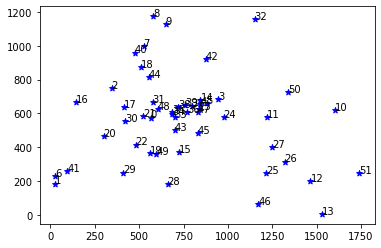

best solution： [0, 47, 23, 24, 11, 27, 25, 46, 45, 36, 39, 37, 4, 14, 5, 3, 50, 26, 12, 13, 51, 10, 32, 42, 29, 41, 1, 6, 16, 2, 40, 7, 8, 9, 18, 44, 38, 35, 48, 31, 17, 20, 30, 21, 34, 33, 43, 15, 28, 49, 19, 22]
distance of best solution： 10163.784513295184


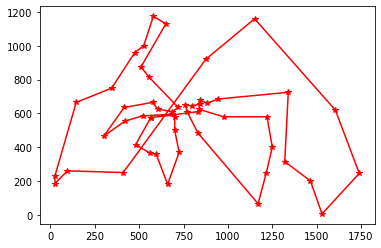

Running time: 3.405139923095703 Seconds


In [4]:
if __name__ == "__main__":
    start = time.time()
    init()
    for i in range(Times):
        solve()
    end = time.time()
    draw_scatter()
    print("best solution：", bestRoute)
    print("distance of best solution：", bestDistValue)
    draw(bestRoute)
    print('Running time: %s Seconds' % (end - start))
